In [1]:
import sqlite3

# DB connection
conn = sqlite3.connect("retail_orders.db")
cursor = conn.cursor()


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Walmart_Sales.csv to Walmart_Sales.csv


In [4]:
import pandas as pd

df = pd.read_csv("Walmart_Sales.csv")
df.head()



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
import sqlite3

conn = sqlite3.connect("retail_orders.db")
df.to_sql("orders", conn, if_exists="replace", index=False)

print("Data loaded into SQL table 'orders' successfully!")


Data loaded into SQL table 'orders' successfully!


In [9]:
pd.read_sql("SELECT Store, Date, Weekly_Sales FROM orders LIMIT 10;", conn)


,Store,Date,Weekly_Sales
0,1,05-02-2010,1643690.90
1,1,12-02-2010,1641957.44
2,1,19-02-2010,1611968.17
3,1,26-02-2010,1409727.59
4,1,05-03-2010,1554806.68
5,1,12-03-2010,1439541.59
6,1,19-03-2010,1472515.79
7,1,26-03-2010,1404429.92
8,1,02-04-2010,1594968.28
9,1,09-04-2010,1545418.53


In [8]:
df.columns


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [10]:
pd.read_sql("SELECT * FROM orders WHERE Weekly_Sales > 100000;", conn)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [11]:
pd.read_sql("SELECT * FROM orders ORDER BY Weekly_Sales DESC LIMIT 10;", conn)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724
1,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484
2,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003
3,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
4,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795
5,13,23-12-2011,3556766.03,0,24.76,3.186,129.984548,6.392
6,20,23-12-2011,3555371.03,0,40.19,3.389,212.236040,7.082
7,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127
8,10,23-12-2011,3487986.89,0,48.36,3.541,129.984548,7.874
9,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163


In [12]:
pd.read_sql("""
SELECT Store, SUM(Weekly_Sales) AS Total_Sales, AVG(Weekly_Sales) AS Avg_Sales
FROM orders
GROUP BY Store
ORDER BY Total_Sales DESC;
""", conn)


,Store,Total_Sales,Avg_Sales
0,20,3.013978e+08,2.107677e+06
1,4,2.995440e+08,2.094713e+06
2,14,2.889999e+08,2.020978e+06
3,13,2.865177e+08,2.003620e+06
4,2,2.753824e+08,1.925751e+06
5,10,2.716177e+08,1.899425e+06
6,27,2.538559e+08,1.775216e+06
7,6,2.237561e+08,1.564728e+06
8,1,2.224028e+08,1.555264e+06
9,39,2.074455e+08,1.450668e+06


In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [15]:
df.to_sql("orders", conn, if_exists="replace", index=False)


6435

In [16]:
pd.read_sql("""
SELECT strftime('%m', Date) AS Month, SUM(Weekly_Sales) AS Monthly_Sales
FROM orders
GROUP BY Month
ORDER BY Monthly_Sales DESC;
""", conn)


,Month,Monthly_Sales
0,None,4.018647e+09
1,10,2.463838e+08
2,09,2.450696e+08
3,06,2.447777e+08
4,02,2.409695e+08
5,03,2.394468e+08
6,04,2.391020e+08
7,05,2.379863e+08
8,11,2.351902e+08
9,12,2.327650e+08


In [17]:
pd.read_sql("SELECT * FROM orders WHERE Holiday_Flag = 1 ORDER BY Weekly_Sales DESC LIMIT 10;", conn)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,4,None,3004702.33,1,47.96,3.225,129.836400,5.143
1,10,None,2950198.64,1,60.68,3.760,129.836400,7.874
2,10,None,2939946.38,1,55.33,3.162,126.669267,9.003
3,14,None,2921709.71,1,46.15,3.039,182.783277,8.724
4,20,None,2906233.25,1,46.38,3.492,211.412076,7.082
5,13,None,2864170.61,1,38.89,3.445,129.836400,6.392
6,20,None,2811634.04,1,46.66,3.039,204.962100,7.484
7,4,None,2789469.45,1,48.08,2.752,126.669267,7.127
8,13,None,2766400.05,1,28.22,2.830,126.669267,7.795
9,14,None,2685351.81,1,48.71,3.492,188.350400,8.523


In [18]:
pd.read_sql("SELECT Store, Weekly_Sales AS Revenue FROM orders LIMIT 5;", conn)


,Store,Revenue
0,1,1643690.90
1,1,1641957.44
2,1,1611968.17
3,1,1409727.59
4,1,1554806.68


In [21]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.to_sql("orders", conn, if_exists="replace", index=False)



6435

In [23]:
monthly_sales = pd.read_sql("""
SELECT strftime('%m', Date) AS Month, SUM(Weekly_Sales) AS Monthly_Sales
FROM orders
WHERE Date IS NOT NULL
GROUP BY Month
ORDER BY Month;
""", conn)


In [24]:
monthly_sales = monthly_sales.dropna()
monthly_sales['Month'] = monthly_sales['Month'].astype(int)


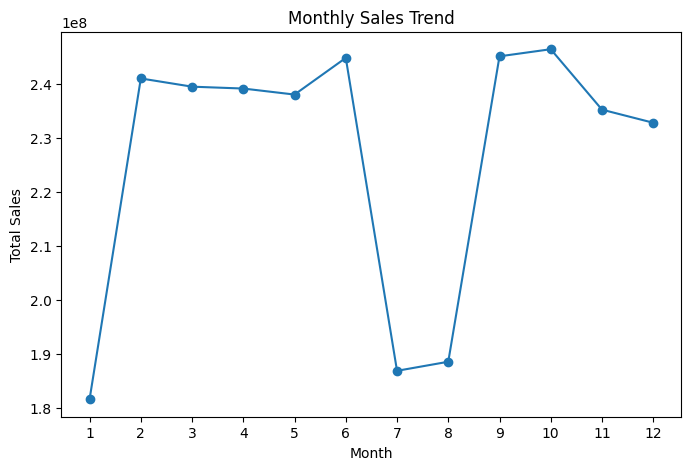

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(monthly_sales['Month'], monthly_sales['Monthly_Sales'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))
plt.show()


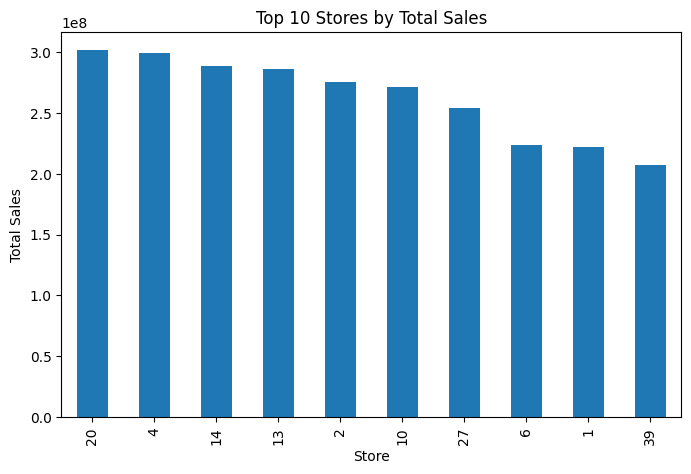

In [26]:
store_sales = pd.read_sql("""
SELECT Store, SUM(Weekly_Sales) AS Total_Sales
FROM orders
GROUP BY Store
ORDER BY Total_Sales DESC
LIMIT 10;
""", conn)

store_sales.plot(kind="bar", x="Store", y="Total_Sales", figsize=(8,5), legend=False)
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()


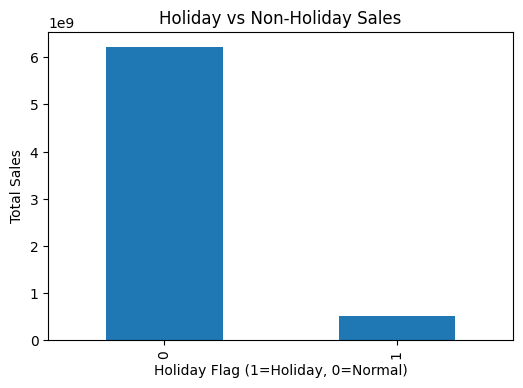

In [27]:
holiday_sales = pd.read_sql("""
SELECT Holiday_Flag, SUM(Weekly_Sales) AS Total_Sales
FROM orders
GROUP BY Holiday_Flag;
""", conn)

holiday_sales.plot(kind="bar", x="Holiday_Flag", y="Total_Sales", figsize=(6,4), legend=False)
plt.title("Holiday vs Non-Holiday Sales")
plt.xlabel("Holiday Flag (1=Holiday, 0=Normal)")
plt.ylabel("Total Sales")
plt.show()


In [29]:
pd.read_sql("SELECT DISTINCT Store FROM orders;", conn)



,Store
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [31]:
pd.read_sql("SELECT * FROM orders WHERE Weekly_Sales BETWEEN 50000 AND 100000;", conn)



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [32]:
pd.read_sql("""
SELECT Store, SUM(Weekly_Sales) AS Total_Sales
FROM orders
GROUP BY Store
HAVING Total_Sales > 10000000
ORDER BY Total_Sales DESC;
""", conn)


,Store,Total_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


In [33]:
pd.read_sql("""
SELECT
    CASE WHEN Holiday_Flag = 1 THEN 'Holiday' ELSE 'Normal Day' END AS Day_Type,
    SUM(Weekly_Sales) AS Total_Sales
FROM orders
GROUP BY Day_Type;
""", conn)


,Day_Type,Total_Sales
0,Holiday,5.052996e+08
1,Normal Day,6.231919e+09


In [34]:
conn.close()
print("SQL session closed. Task completed ✅")


SQL session closed. Task completed ✅
